### 1. 全排列

In [5]:
def permutation(elements):
    if len(elements) == 0: return [[]]
    head = elements[0]
    remain_parts_result = permutation(elements[1:])
    
    return [r[:i] + [head] + r[i:] for i in range(len(elements)) for r in remain_parts_result]

In [11]:
len(permutation(['我', '很', '高', '兴']))

24

### 1. Merge Sort 归并排序

In [21]:
def merge_sort(elements):
    
    if len(elements) == 1: return elements
    
    mid = len(elements) // 2
    
    left, right = merge_sort(elements[:mid]), merge_sort(elements[mid:])
    sorted_result = []
    while left and right:
        left_head = left[0]
        right_head = right[0]
        if left_head < right_head:
            sorted_result.append(left_head)
            left.pop(0)
        else:
            sorted_result.append(right_head)
            right.pop(0)
    sorted_result += (left or right)
    
    return sorted_result

In [22]:
arr = [8, 5, 6, 9, 3, 4, 1, 2, 7]
merge_sort(arr)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

### 3. Quick Sort 快速排序

In [23]:
import random
def quick_sort(elements):
    if not elements: return []
    pivot = random.choice(elements)
    left = quick_sort([e for e in elements if e < pivot])
    right = quick_sort([e for e in elements if e > pivot])
    return left + [pivot] + right

In [24]:
quick_sort(arr)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

### 4. Graph Traverse 图遍历问题

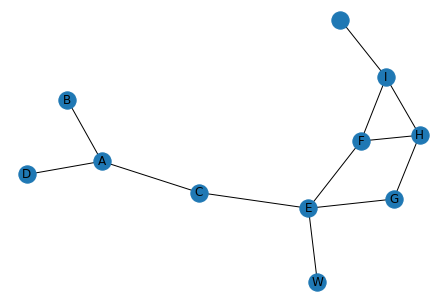

In [52]:
simple_graph = {
    'A': 'B C D'.split(), 
    'B': 'A'.split(), 
    'C': 'A E'.split(),
    'D': 'A'.split(), 
    'E': 'F C G W'.split(),
    'W': 'E'.split(), 
    'F': 'H I E'.split(), 
    'G': 'H E'.split(), 
    'H': 'I F G'.split(), 
    'I': 'F H'
}
import networkx as nx
nx.draw(nx.Graph(simple_graph), with_labels=True)

In [55]:
def traverse(start, graph):
    if not graph: return [start]
    sub_graph_root = graph[start]
    graph.pop(start)
    result = [start]
    for r in sub_graph_root:
        
        if r not in graph: 
            continue
        result += traverse(r, graph)
    return result

In [56]:
tmp_graph = simple_graph.copy()
traverse('D', tmp_graph)

['D', 'A', 'B', 'C', 'E', 'F', 'H', 'I', 'G', 'W']

### 5. Edit Distance 编辑距离问题

In [100]:
from functools import lru_cache
solution = {}

@lru_cache(maxsize=2 ** 10)
def edit_distance(string1, string2):
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    candidate = []
    if string1[-1] == string2[-1]:
        string1_2_decrease = (edit_distance(string1[:-1], string2[:-1]), '继续向前 ')
    else:
        string1_2_decrease = (edit_distance(string1[:-1], string2[:-1]) + 1, f"替换 {string1[-1]}, {string2[-1]}")
    
    string1_decrease_string2_keep = (edit_distance(string1[:-1], string2) + 1, f"删除 {string1[-1]}")
    string1_keep_string2_decrease = (edit_distance(string1, string2[:-1]) + 1, f"增加 {string2[-1]}")
    
    candidate = [string1_2_decrease, string1_decrease_string2_keep, string1_keep_string2_decrease]
    
    min_distance, operation = min(candidate, key=lambda x: x[0])
    solution[(string1, string2)] = operation
    
    return min_distance

def parse_solution(string1, string2, record):
    if len(string1) == len(string2) == 1: return [record[(string1, string2)]]
    operations = {
        '替换': (-1, -1), 
        '继续向前': (-1, -1), 
        '增加': (None, -1), 
        '删除': (-1, None)
    }
    operation = record[(string1, string2)]
    op = operation.split()[0]
    s1_i, s2_i = operations[op]
    
    return [operation] + parse_solution(string1[:s1_i], string2[:s2_i], record)

In [105]:
string1 = "Test"
string2 = "Desk"

print(edit_distance(string1, string2))
for op in parse_solution(string1, string2, solution):
    print(op)

2
替换 t, k
继续向前 
继续向前 
替换 T, D


### 7. 过滤重复值

In [108]:
def filter_pattern(elements):
    if not elements: return []
    for i in range(len(elements) // 2, 0, -1):
        elements_remain = elements[i:]
        if elements_remain[:i] == elements[:i]:
            return filter_pattern(elements_remain)
    return [elements[0]] + filter_pattern(elements[1:])

In [111]:
''.join(filter_pattern('这家店真的很好很好吃呀, 真的很嘻嘻嘻嘻嘻和嘻嘻嘻喜欢'))

'这家店真的很好吃呀, 真的很嘻和嘻喜欢'

### 7. Enginee / Scientist
- 1. 暴力穷举
- 2. 分而治之
- 3. 随机化
- 4. 逐步迭代

In [62]:
nest = ((1, 2, ((((3, 4))))), (5, 6, (((((((7, 8)))))))))
def flatten(elements):
    if not elements: return []
    if not isinstance(elements, tuple): return [elements]
    else:
        return flatten(elements[0]) + flatten(elements[1:])

In [63]:
flatten(nest)

[1, 2, 3, 4, 5, 6, 7, 8]